In [114]:
%pip install python-dotenv

import urllib.request, json
from datetime import datetime
from dotenv import load_dotenv
import os
from tqdm.notebook import tqdm

In [11]:
dir = '/content/drive/My Drive/Colab Notebooks/Warcraftlogs Test/'
load_dotenv(dotenv_path=dir+'.env')
APIKEY = os.getenv('MY_WCLOGS_APIKEY')

In [22]:
with urllib.request.urlopen("https://www.warcraftlogs.com:443/v1/reports/guild/The%20Friendly%20Bunch/Stormrage/US?api_key=" + APIKEY) as url:
  data = json.loads(url.read().decode())

nzothlogs = []
nzoth_reports = {}
for num, report in reversed(list(enumerate(reversed(nzothlogs)))):
  nzoth_reports[num] = report['id']

In [23]:
print(nzothlogs)
# timetest = nzothlogs[0]['start']
print(timetest)
datetest = datetime.fromtimestamp(timetest/1e3)
print(datetest)

START_TIME = 1598664436202
START_DATE = datetime.fromtimestamp(START_TIME/1e3)
print(START_DATE)

for report in data:
  if report['start'] >= START_TIME:
    nzothlogs.append(report)

nzothlogs.reverse()

[]
1599874083711
2020-09-12 01:28:03.711000
2020-08-29 01:27:16.202000


In [28]:
print(nzothlogs)

[{'id': 'G9RWrnZQyChpB2cL', 'title': 'TFB Mythic Furious Friday 8-28', 'owner': 'RayRayXu', 'start': 1598664436202, 'end': 1598676083859, 'zone': 24}, {'id': '3N7Zftq2FH46zLd1', 'title': 'TFB Mythic Silly Sunday 8-30', 'owner': 'RayRayXu', 'start': 1598834626206, 'end': 1598842868685, 'zone': 24}, {'id': 'xctJwDQ86fjzrGqv', 'title': 'TFB Mythic Terrible Tuesday 9-1', 'owner': 'RayRayXu', 'start': 1599008118060, 'end': 1599017888321, 'zone': 24}, {'id': 'cAbtdkJTLzr92qfR', 'title': 'TFB Mythic Tropical Thursday 9-3', 'owner': 'RayRayXu', 'start': 1599180967106, 'end': 1599190705745, 'zone': 24}, {'id': 'XwdKa8jckh47xMgL', 'title': 'TFB Mythic Fail-proof Friday 9-4', 'owner': 'RayRayXu', 'start': 1599267880431, 'end': 1599285695824, 'zone': 24}, {'id': 'BnMpNWF7P8dKcY4A', 'title': 'TFB Magical Mythic Monday 9-7', 'owner': 'RayRayXu', 'start': 1599528079220, 'end': 1599528652767, 'zone': 21}, {'id': 'LgmN1PRZ8KtWGhYH', 'title': 'TFB Mythic Tenacious Tuesday 9-8', 'owner': 'RayRayXu', 'sta

In [ ]:
# for num, logid in nzoth_reports.items():
 #  with urlib.request.urlopen("")

984PDJ73AajwKXLG
LgmN1PRZ8KtWGhYH
BnMpNWF7P8dKcY4A
XwdKa8jckh47xMgL
cAbtdkJTLzr92qfR
xctJwDQ86fjzrGqv
3N7Zftq2FH46zLd1
G9RWrnZQyChpB2cL


In [25]:
with urllib.request.urlopen("https://www.warcraftlogs.com:443/v1/report/fights/984PDJ73AajwKXLG?api_key=" + APIKEY) as url:
  data2 = json.loads(url.read().decode())


In [26]:
print(data2['friendlies'])
print(len(data2['friendlies']))
print(type(data2['friendlies'][0]))
for friend in data2['friendlies']:
  if friend['id'] == 18:
    print(friend)
  

[{'name': 'Drõ', 'id': 313, 'guid': 211254392, 'type': 'Hunter', 'server': 'BleedingHollow', 'icon': 'Hunter-Survival', 'fights': [{'id': 33}, {'id': 34}]}, {'name': 'Yourstepsis', 'id': 10, 'guid': 213747071, 'type': 'Mage', 'server': 'Stormrage', 'icon': 'Mage-Fire', 'fights': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}, {'id': 7}, {'id': 8}, {'id': 9}, {'id': 10}, {'id': 11}, {'id': 12}, {'id': 13}, {'id': 14}, {'id': 15}, {'id': 16}, {'id': 17}, {'id': 18}, {'id': 19}, {'id': 20}, {'id': 21}]}, {'name': 'Gebish Togglebot', 'id': 235, 'guid': 145426, 'type': 'NPC', 'icon': 'custom-icon-inv_weapon_rifle_33', 'fights': [{'id': 24, 'instances': 1, 'groups': 4}]}, {'name': 'Pikelbrigade', 'id': 12, 'guid': 211259192, 'type': 'Warrior', 'server': 'Stormrage', 'icon': 'Warrior-Arms', 'fights': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}, {'id': 7}, {'id': 8}, {'id': 9}, {'id': 10}, {'id': 11}, {'id': 12}, {'id': 13}, {'id': 14}, {'id': 15}, {'id

# FIGHT LENGTHS

In [85]:
# For each grouped report, get each individual fight
allfight_lengths = []
fightlength_byid = {}
for report in nzothlogs:
  with urllib.request.urlopen("https://www.warcraftlogs.com:443/v1/report/fights/" + report['id'] + '?api_key=' + APIKEY) as url:
    fighttuples_list = []
    datalog = json.loads(url.read().decode())
    fights_list = datalog['fights']
    for fight in fights_list:
      if fight['name'] != "N\'Zoth the Corruptor":
        continue
      starttime = fight['start_time']
      endtime = fight['end_time']
      totaltime = (endtime-starttime)/1e3 # Convert ms to s
      allfight_lengths.append(totaltime)
      fighttuples_list.append((starttime, endtime))
    fightlength_byid[report['id']] = fighttuples_list
print(len(allfight_lengths))

140


In [212]:
wipedays = [0]
for key, value in fightlength_byid.items():
  if len(value) == 0:
    continue
  wipedays.append(wipedays[-1]+len(value))
print(wipedays)

[0, 21, 39, 59, 80, 104, 119, 140]


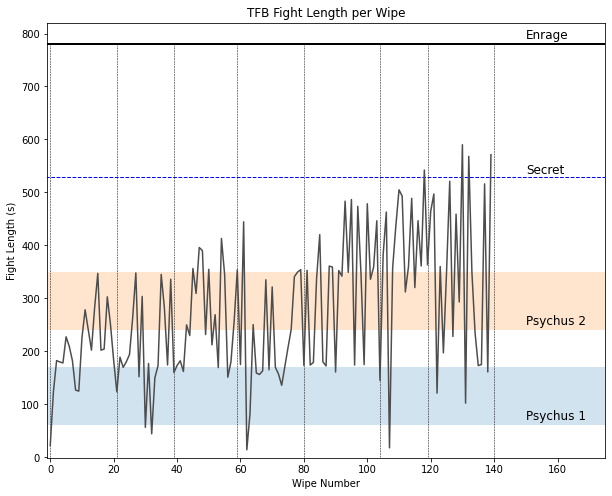

<Figure size 432x288 with 0 Axes>

In [231]:
import matplotlib.pyplot as plt

Y_LIM = 820 # 780s is max time of nzoth hard enrage
X_LIM = 175 # Number of pulls

# Psychus times
# ---
# P1 -> 1 minute -> 60s to 2m50s -> 170s
# P2 -> 4 m -> 240s to 5m50s -> 350s
# Secret -> 8m50s -> 530s

plt.figure(1, figsize=(10,8))

# Plot psychus phases and secret
plt.fill_between(range(-10, X_LIM+10), 60, 170, alpha=0.2)
plt.fill_between(range(-10, X_LIM+10), 240, 350, alpha=0.2)
plt.plot(range(-10, X_LIM+10), [530 for i in range(-10, X_LIM+10)], color='blue', linestyle='dashed', linewidth=1)
plt.plot(range(-10, X_LIM+10), [780 for i in range(-10, X_LIM+10)], color='black', linestyle='-', linewidth=2)

for day in wipedays:
  plt.plot([day for i in range(0, 780)], range(0, 780), color='black', linestyle='--', linewidth=0.5)

plt.plot(allfight_lengths, color='0.3')

plt.text(X_LIM-25, 70, 'Psychus 1', fontsize=12)
plt.text(X_LIM-25, 250, 'Psychus 2', fontsize=12)
plt.text(X_LIM-25, 535, 'Secret', fontsize=12)
plt.text(X_LIM-25, 790, 'Enrage', fontsize=12)

plt.title('TFB Fight Length per Wipe')
plt.xlabel('Wipe Number')
plt.ylabel('Fight Length (s)')

plt.axis([-1, X_LIM, -1, Y_LIM])
plt.show()
plt.savefig(dir+'fightlength.png', format='png')

# GETTING HIT BY RED

In [116]:
CORRUPTED_VISCERA_ID = 318688

EVENT = 'damage-taken/'

def getURL(event, fight, starttime=0, endtime=0, hostility=0, abilityid=0, apikey=None):
  url = "https://www.warcraftlogs.com:443/v1/report/events/" + event + str(fight) + "?start=" + str(starttime) + "&end=" + str(endtime) \
   + "&hostility=" + str(hostility) + "&abilityid=" + str(abilityid) + "&api_key=" + apikey
  # print(url)
  return url


fight_times = {}
hitbyreds = []
for reportcode, timelist in tqdm(fightlength_byid.items()):
  for timeset in tqdm(timelist):
    start, end = timeset
    with urllib.request.urlopen(getURL(EVENT, reportcode, starttime=start, endtime=end, abilityid=CORRUPTED_VISCERA_ID, apikey=APIKEY)) as url:
      data = json.loads(url.read().decode())
      hitbyreds.append(len(data['events']))
print(len(hitbyreds))




140


In [207]:
# Normalize hitbyreds?

hitbyreds_norm = []
for i in range(len(hitbyreds)):
  hitbyreds_norm.append(hitbyreds[i]/ (allfight_lengths[i] if allfight_lengths[i] <= 390 else 390) * 60)

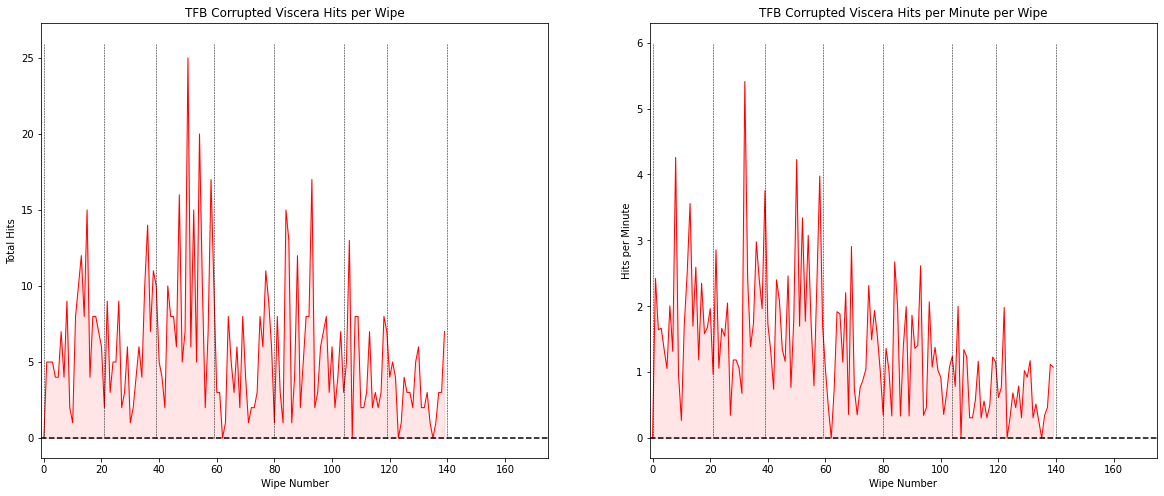

In [232]:
plt.figure(2, figsize=(20,8))


ax1 = plt.subplot(121)
ax1.plot(hitbyreds, color='red', linewidth=1)
ax1.fill_between(range(len(hitbyreds)), hitbyreds, alpha=0.1, color='red')
ax1.plot(range(-1, X_LIM+10), [0 for i in range(-1, X_LIM+10)], color='black', linestyle='--')

for day in wipedays:
  ax1.plot([day for i in range(0, 27)], range(0, 27), color='black', linestyle='--', linewidth=0.5)

plt.xlim([-1, X_LIM])
ax1.set_xlabel('Wipe Number')
ax1.set_ylabel('Total Hits')
ax1.set_title('TFB Corrupted Viscera Hits per Wipe')

ax2 = plt.subplot(122)
ax2.plot(hitbyreds_norm, color='red', linewidth=1)
ax2.fill_between(range(len(hitbyreds_norm)), hitbyreds_norm, alpha=0.1, color='red')
ax2.plot(range(-1, X_LIM+10), [0 for i in range(-1, X_LIM+10)], color='black', linestyle='--')

for day in wipedays:
  ax2.plot([day for i in range(0, 7)], range(0, 7), color='black', linestyle='--', linewidth=0.5)

ax2.set_xlabel('Wipe Number')
ax2.set_ylabel('Hits per Minute')
ax2.set_title('TFB Corrupted Viscera Hits per Minute per Wipe')
plt.xlim([-1, X_LIM])

plt.savefig(dir+'corruptedviscera.png', format='png')
plt.show()

# Devour Thoughts

In [181]:
hitbydt = []
DEVOUR_THOUGHTS_ID = 318771
for reportcode, timelist in tqdm(fightlength_byid.items()):
  for timeset in tqdm(timelist):
    start, end = timeset
    with urllib.request.urlopen(getURL(EVENT, reportcode, starttime=start, endtime=end, abilityid=DEVOUR_THOUGHTS_ID, apikey=APIKEY)) as url:
      data = json.loads(url.read().decode())
      hitbydt.append(len(data['events']))

In [183]:
hitbypb = []
PSYCHIC_BURST_ID = 318768
for reportcode, timelist in tqdm(fightlength_byid.items()):
  for timeset in tqdm(timelist):
    start, end = timeset
    with urllib.request.urlopen(getURL(EVENT, reportcode, starttime=start, endtime=end, abilityid=PSYCHIC_BURST_ID, apikey=APIKEY)) as url:
      data = json.loads(url.read().decode())
      hitbypb.append(len(data['events']))

In [209]:
# Normalize DT
hitbydt_norm = []
hitbypb_norm = []
for i in range(len(hitbyreds)):
  hitbydt_norm.append(hitbydt[i]/ (allfight_lengths[i] if allfight_lengths[i] <= 390 else 390) * 60)
  hitbypb_norm.append(hitbypb[i]/ (allfight_lengths[i] if allfight_lengths[i] <= 390 else 390) * 60)

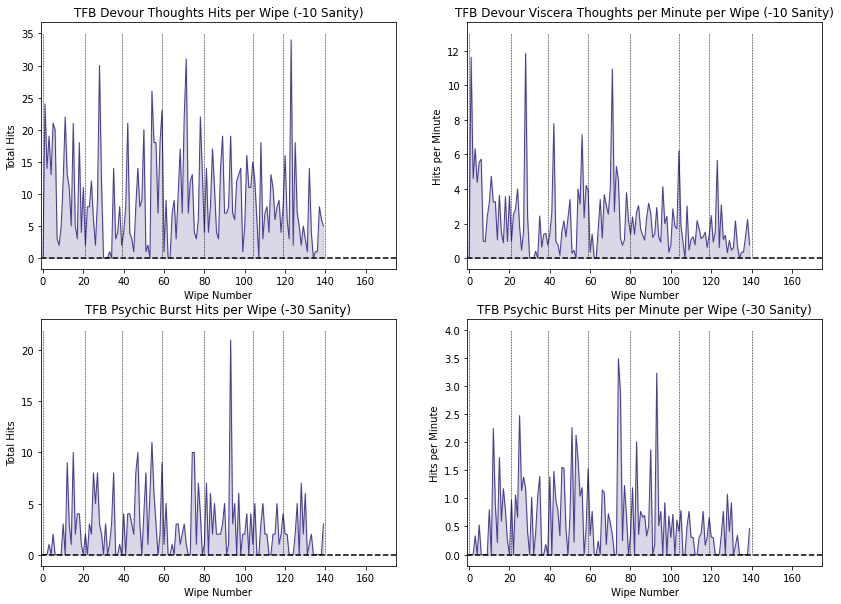

<Figure size 432x288 with 0 Axes>

In [233]:
plt.figure(3, figsize=(14,10))
ax1 = plt.subplot(221)
ax1.plot(hitbydt, color='darkslateblue', linewidth=1)
ax1.fill_between(range(len(hitbydt)), hitbydt, alpha=0.2, color='darkslateblue')
ax1.plot(range(-1, X_LIM+10), [0 for i in range(-1, X_LIM+10)], color='black', linestyle='--')

for day in wipedays:
  ax1.plot([day for i in range(0, 36)], range(0, 36), color='black', linestyle='--', linewidth=0.5)

plt.xlim([-1, X_LIM])
ax1.set_xlabel('Wipe Number')
ax1.set_ylabel('Total Hits')
ax1.set_title('TFB Devour Thoughts Hits per Wipe (-10 Sanity)')

ax2 = plt.subplot(222)
ax2.plot(hitbydt_norm, color='darkslateblue', linewidth=1)
ax2.fill_between(range(len(hitbydt_norm)), hitbydt_norm, alpha=0.2, color='darkslateblue')
ax2.plot(range(-1, X_LIM+10), [0 for i in range(-1, X_LIM+10)], color='black', linestyle='--')

for day in wipedays:
  ax2.plot([day for i in range(0, 14)], range(0, 14), color='black', linestyle='--', linewidth=0.5)

ax2.set_xlabel('Wipe Number')
ax2.set_ylabel('Hits per Minute')
ax2.set_title('TFB Devour Viscera Thoughts per Minute per Wipe (-10 Sanity)')
plt.xlim([-1, X_LIM])

ax3 = plt.subplot(223)
ax3.plot(hitbypb, color='darkslateblue', linewidth=1)
ax3.fill_between(range(len(hitbypb)), hitbypb, alpha=0.2, color='darkslateblue')
ax3.plot(range(-1, X_LIM+10), [0 for i in range(-1, X_LIM+10)], color='black', linestyle='--')

for day in wipedays:
  ax3.plot([day for i in range(0, 23)], range(0, 23), color='black', linestyle='--', linewidth=0.5)

plt.xlim([-1, X_LIM])
# plt.ylim([-1, 10])
ax3.set_xlabel('Wipe Number')
ax3.set_ylabel('Total Hits')
ax3.set_title('TFB Psychic Burst Hits per Wipe (-30 Sanity)')

ax4 = plt.subplot(224)
ax4.plot(hitbypb_norm, color='darkslateblue', linewidth=1)
ax4.fill_between(range(len(hitbypb_norm)), hitbypb_norm, alpha=0.2, color='darkslateblue')
ax4.plot(range(-1, X_LIM+10), [0 for i in range(-1, X_LIM+10)], color='black', linestyle='--')

for day in wipedays:
  ax4.plot([day for i in range(0, 5)], range(0, 5), color='black', linestyle='--', linewidth=0.5)

ax4.set_xlabel('Wipe Number')
ax4.set_ylabel('Hits per Minute')
ax4.set_title('TFB Psychic Burst Hits per Minute per Wipe (-30 Sanity)')
plt.xlim([-1, X_LIM])

plt.show()
plt.savefig(dir+'devourthoughts.png', format='png')


In [182]:
print(len(fightlength_byid))
print(type(fightlength_byid))
print(len(hitbydt))

8
<class 'dict'>
140


In [89]:
with urllib.request.urlopen("https://www.warcraftlogs.com:443/v1/report/events/damage-taken/984PDJ73AajwKXLG?start=10591620&end=11162724&hostility=0&abilityid=318688&api_key=" + APIKEY) as url:
  data = json.loads(url.read().decode())
  print(len(data['events']))

7


https://www.warcraftlogs.com/v1/docs#!/Report/report_tables_view_code_get

9-13-2020 : 140 Wipes Total